In [82]:
# Importing the packages

In [146]:
!pip install pmdarima
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pmdarima as pm
import statsmodels.tsa.api as tsa
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.stats.diagnostic import acorr_ljungbox, het_arch
from statsmodels.stats.stattools import jarque_bera
from statsmodels.stats.diagnostic import breaks_cusumolsresid
from sklearn.metrics import mean_squared_error, r2_score

In [84]:
# Load stock market data

In [86]:
df = pd.read_excel("C:\\Users\\PC\\Downloads\\Project\\DATA.xlsx")

In [88]:
df.head()

,Trading Session\n,Asset,Ticker,Opening Price,Closing Price,Daily High,Daily Low,Number of Shares Traded,Trading Volume,Number of Contracts,Market Capitalization,Adjusted Close,Stock_Return
0,30/06/2025,AfricanBank,AB,275.0,280.0,280.0,267.0,1689006.0,4.597687e+08,75,6.042017e+10,280.0,0.022027
1,26/06/2025,AfricanBank,AB,273.0,273.9,274.0,270.1,27541.0,7.512227e+06,32,5.910388e+10,273.9,0.006961
2,25/06/2025,AfricanBank,AB,265.5,272.0,272.0,265.5,7293.0,1.982552e+06,27,5.869388e+10,272.0,0.000000
3,24/06/2025,AfricanBank,AB,268.0,272.0,272.0,268.0,33706.0,9.130294e+06,53,5.869388e+10,272.0,0.033648
4,23/06/2025,AfricanBank,AB,270.0,263.0,270.0,262.0,13192.0,3.507221e+06,25,5.675181e+10,263.0,-0.026268


In [90]:
df['Stock_Return'].describe()

count    576.000000
mean       0.000939
std        0.014433
min       -0.079137
25%       -0.005398
50%        0.000000
75%        0.008466
max        0.078472
Name: Stock_Return, dtype: float64

In [92]:
# Data exploration

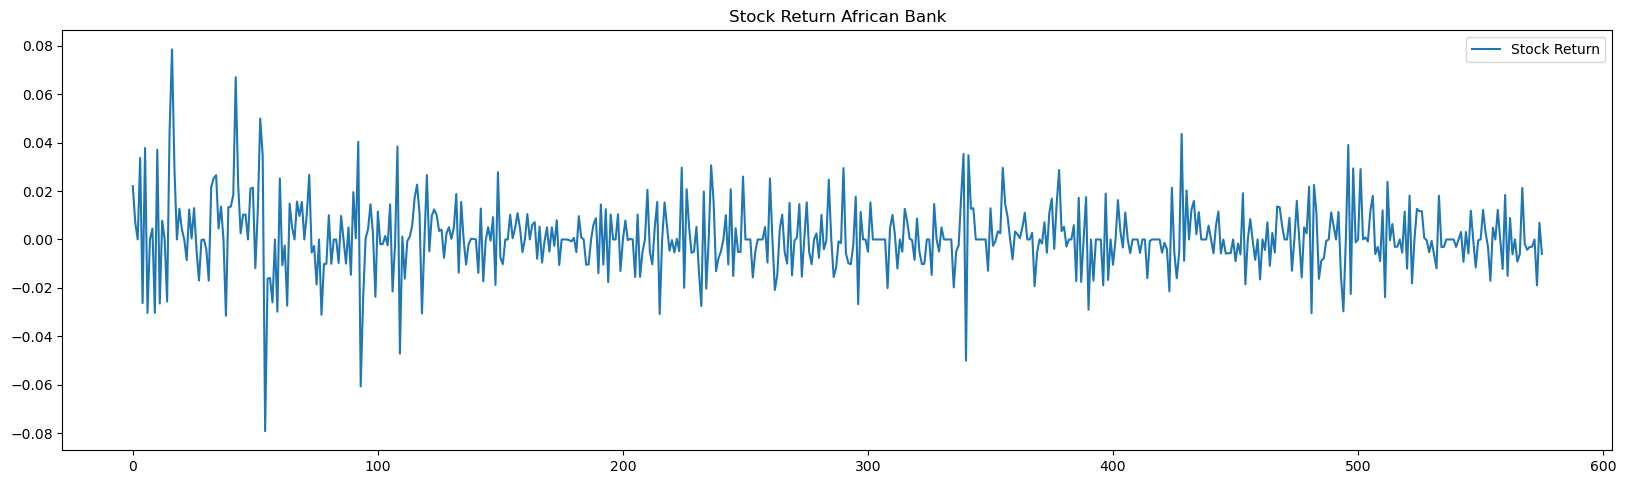

In [94]:
plt.figure(figsize=(20,12))
plt.subplot(2, 1, 1)
plt.title('Stock Return African Bank')
plt.plot(df.Stock_Return, label='Stock Return')
plt.legend()
plt.show()

In [96]:
# Testing the time series for stationarity using the Augmented Dickey-Fuller test

In [98]:
data = df["Stock_Return"].tolist()
result = adfuller(data)
print("1. ADF:", result[0])
print("2. P-Value:", result[1])
pvalue = result[1]
if pvalue < 0.05:
    print('stationary')
else:
    print('non-stationary')
print("3. Num Of Lags:", result[2])
print("4. Num Of Observations Used For ADF Regression:", result[3])
print("5. Critical Values:")
for key, val in result[4].items():
    print(f"\t{key}: {val}") 

1. ADF: -6.268354356756328
2. P-Value: 4.061464395866221e-08
stationary
3. Num Of Lags: 15
4. Num Of Observations Used For ADF Regression: 560
5. Critical Values:
	1%: -3.442081300525009
	5%: -2.8667149792729596
	10%: -2.569526100127551


In [100]:
# Defining the optimal parameters p and q

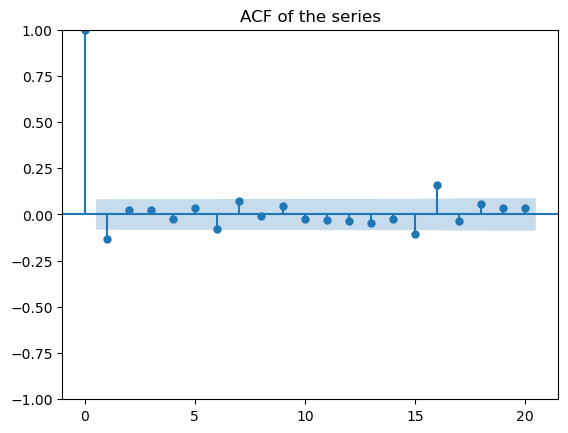

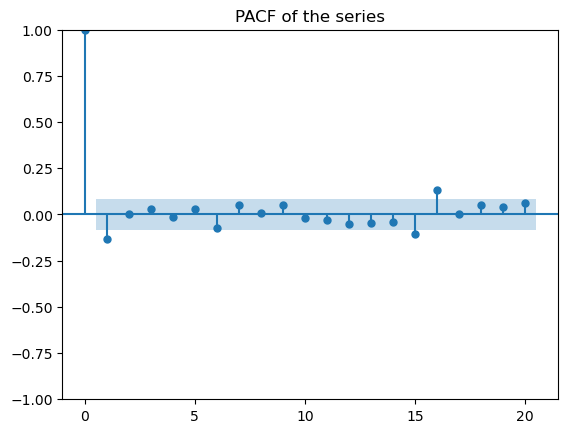

In [102]:
plot_acf(df['Stock_Return'].dropna(), lags=20)
plt.title("ACF of the series")
plt.show()

plot_pacf(df['Stock_Return'].dropna(), lags=20)
plt.title("PACF of the series")
plt.show()

In [104]:
#Automatically identifying the optimal ARIMA(p,d,q) order
ts = pd.read_excel("C:\\Users\\PC\\Downloads\\Project\\DATA.xlsx")["Stock_Return"]  
modele = pm.auto_arima(ts, seasonal=False, trace=True,
                       suppress_warnings=True, stepwise=True)
print(modele.summary())
print("Selected ARIMA order :", modele.order)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-3246.734, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-3244.379, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-3252.223, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-3251.782, Time=0.07 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-3250.278, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-3250.258, Time=0.13 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-3248.306, Time=0.20 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-3253.388, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-3244.818, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-3251.399, Time=0.15 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-3251.396, Time=0.40 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-3253.041, Time=0.20 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-3249.412, Time=0.29 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 1.880 seconds
         

In [105]:
# Estimating an ARMA model

In [108]:
y = df["Stock_Return"]
model = tsa.ARIMA(y, order=(1, 0, 0))  
results = model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:           Stock_Return   No. Observations:                  576
Model:                 ARIMA(1, 0, 0)   Log Likelihood                1629.694
Date:                Fri, 18 Jul 2025   AIC                          -3253.388
Time:                        22:46:49   BIC                          -3240.320
Sample:                             0   HQIC                         -3248.291
                                - 576                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0009      0.001      1.673      0.094      -0.000       0.002
ar.L1         -0.1347      0.025     -5.453      0.000      -0.183      -0.086
sigma2         0.0002   6.67e-06     30.617      0.0

In [110]:
# Residual analysis

In [112]:
residuals = results.resid

In [114]:
# Plotting the residuals

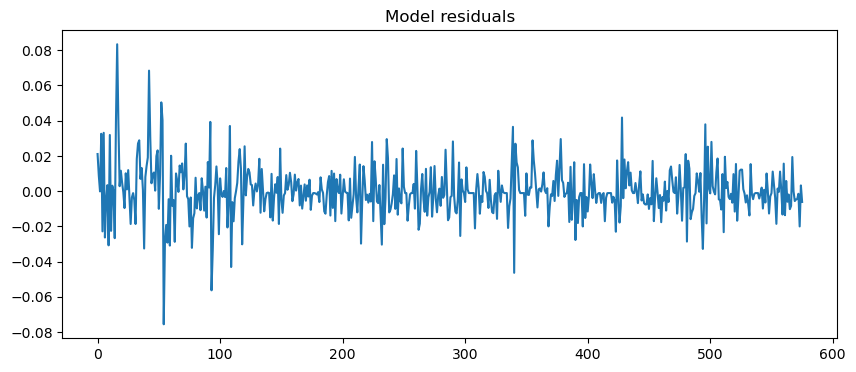

In [116]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title("Model residuals")
plt.show()

In [118]:
# Histogram

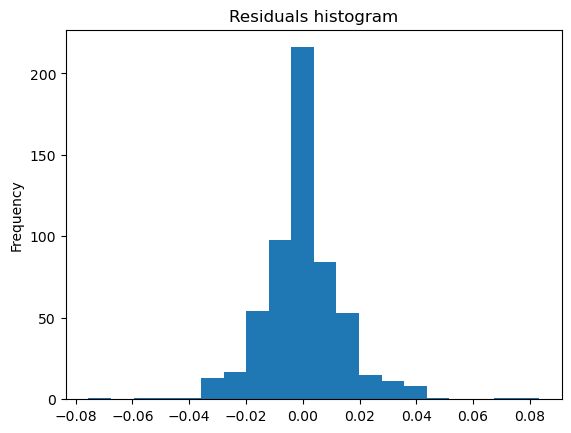

In [120]:
residuals.plot(kind='hist', bins=20, title="Residuals histogram")
plt.show() 

In [122]:
# White noise test (Ljung-Box)

In [124]:
lb_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
print("Ljung-Box Test :\n", lb_test)

Ljung-Box Test :
      lb_stat  lb_pvalue
10  7.209269   0.705552


In [126]:
# Normality test (Jarque-Bera)

In [128]:
jb_test = jarque_bera(residuals)
print("Jarque-Bera test statistic:", jb_test[0], "| p-value:", jb_test[1])

Jarque-Bera test statistic: 536.6762221811093 | p-value: 2.8989389471496922e-117


In [130]:
# CUSUM test

In [132]:
cusum_stat, p_value, crit_vals = breaks_cusumolsresid(results.resid, ddof=results.df_model)
print("CUSUM p-value :", p_value)

CUSUM p-value : 0.026983898926398617


In [134]:
# Short-term forecasting

In [136]:
forecast_steps = 10
forecast = results.get_forecast(steps=forecast_steps)

In [138]:
# Predicted values

In [140]:
predicted_mean = forecast.predicted_mean
conf_int = forecast.conf_int()
print(predicted_mean)

576    0.001863
577    0.000808
578    0.000950
579    0.000931
580    0.000933
581    0.000933
582    0.000933
583    0.000933
584    0.000933
585    0.000933
Name: predicted_mean, dtype: float64


In [142]:
# Plotting

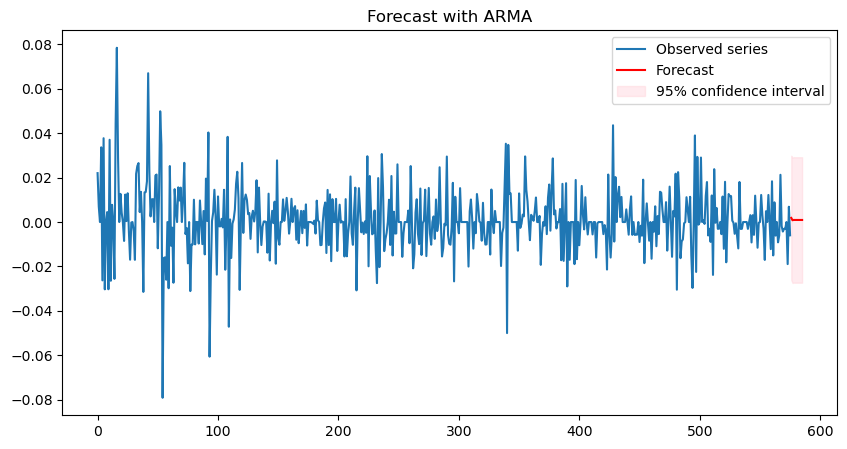

In [144]:
plt.figure(figsize=(10, 5))
plt.plot(y, label='Observed series')
plt.plot(np.arange(len(y), len(y) + forecast_steps), predicted_mean, label='Forecast', color='red')
plt.fill_between(np.arange(len(y), len(y) + forecast_steps),
                 conf_int.iloc[:, 0],
                 conf_int.iloc[:, 1],
                 color='pink', alpha=0.3, label='95% confidence interval')
plt.title('Forecast with ARMA')
plt.legend()
plt.show()